In [1]:
# Dependencies
import json
import pandas as pd
import random
import requests as req
import apikeys
import openweathermapy as ow
import csv
import matplotlib.pyplot as plt

from citipy import citipy

In [2]:
# Randomly generate the latitude and longitude
number_of_cities = 5
coordinates = [[]]*number_of_cities

for x in range (number_of_cities):
    coordinates[x] = (random.randint(-90, 90), random.randint(-180, 180))

#print (coordinates)

In [3]:
# Use the randomly generated latitude and longitude to find the nearest city using citipy library.
cities = []
for lat, lon in coordinates:
    cities.append(citipy.nearest_city(lat, lon))

# Print city and country code for debugging purpose
#for city in cities:
#    country_code = city.country_code
#    name = city.city_name
#    print("The country code of " + name + " is '" + country_code + "'.")

In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather"

params = {'APPID': apikeys.OWM_API_KEY,
          'q': '',
          'units': 'imperial',
#          'format' : 'json'
         }

weather_data = []

# Open the file using "write" mode. Specify the variable to hold the contents
with open('weather.csv', 'w', newline='') as csvfile:
    
    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=',')
    
    # Write the first row (column headers)
    csvwriter.writerow(['City Number', 'City Name', 'URL'])
    
    # Loop through the list of cities and perform a request for data on each
    for city in cities:
        params['q'] = city.city_name
        weather_response = req.get(url, params=params).json()
    
        # Add data to `weather_data` list    
        weather_data.append(weather_response)

        # Print out city number, city name, and url used for processing
        #city_number = weather_data.get("id")
        query_url = url + "?q=" + city.city_name + "&units=imperial" + "&appid=" + apikeys.OWM_API_KEY 
        print(" ", city.city_name, query_url)
        
        # Save the city number, city name, and url used for processing in a csv file.
        csvrow = " ", city.city_name, query_url
        csvwriter.writerow(csvrow)

# Pretty print the response
print()
print("The weather API responded with: ")

#print(json.dumps(weather_data, indent=4, sort_keys=True))
print()

  tiksi http://api.openweathermap.org/data/2.5/weather?q=tiksi&units=imperial&appid=6f403835e1df12c89e4b99571a133d5f
  punta arenas http://api.openweathermap.org/data/2.5/weather?q=punta arenas&units=imperial&appid=6f403835e1df12c89e4b99571a133d5f
  dosso http://api.openweathermap.org/data/2.5/weather?q=dosso&units=imperial&appid=6f403835e1df12c89e4b99571a133d5f
  nantucket http://api.openweathermap.org/data/2.5/weather?q=nantucket&units=imperial&appid=6f403835e1df12c89e4b99571a133d5f
  hobart http://api.openweathermap.org/data/2.5/weather?q=hobart&units=imperial&appid=6f403835e1df12c89e4b99571a133d5f

The weather API responded with: 



In [5]:
#Save the latitude of the random cities selected.
lat = [data.get("coord").get("lat") for data in weather_data]

In [6]:
# Extract temperature, humidity, cloudiness, and wind data to show relationship against latitude.
temp_data = [data.get("main").get("temp") for data in weather_data]
humidity_data = [data.get("main").get("humidity") for data in weather_data]
cloudiness_data = [data.get("clouds").get("all") for data in weather_data]
speed_data = [data['wind']['speed'] for data in weather_data]

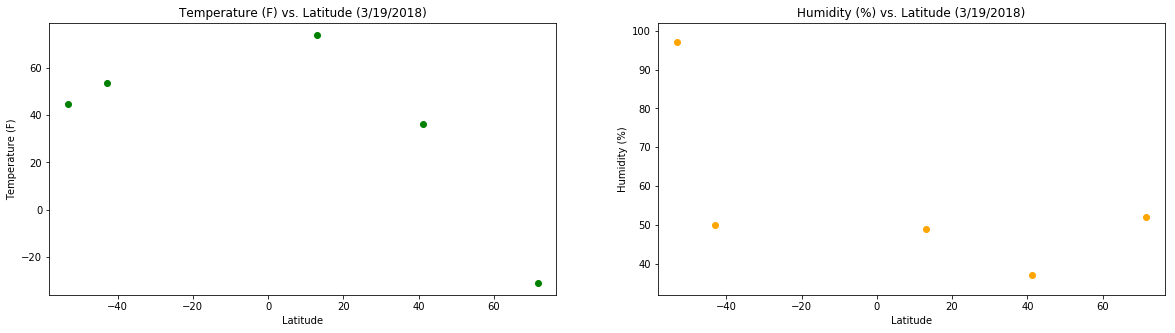

In [9]:
#Scatter plots to showcase the following relationships: #  Temperature (F) vs. Latitude and Humidity (%) vs. Latitude

# Create figure
fig = plt.figure(figsize=(20, 5))

# Make plot on the left
fig.add_subplot(1, 2, 1)
plt.title("Temperature (F) vs. Latitude (3/19/2018)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# ADJUST FIGURE SIZE TO FIT ALL EXTREME POINTS
plt.xlim(min(lat) - 5, max(lat) + 5)
plt.ylim(min(temp_data) - 5, max(temp_data) + 5)

plt.scatter(lat, temp_data, marker="o", color="green")

#  Scatter plot to showcase Humidity (%) vs. Latitude

# Make plot on the right
fig.add_subplot(1, 2, 2)
plt.title("Humidity (%) vs. Latitude (3/19/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# ADJUST FIGURE SIZE TO FIT ALL EXTREME POINTS
plt.xlim(min(lat) - 5, max(lat) + 5)
plt.ylim(min(humidity_data) - 5, max(humidity_data) + 5)

plt.scatter(lat, humidity_data, marker="o", color="orange")
plt.show()

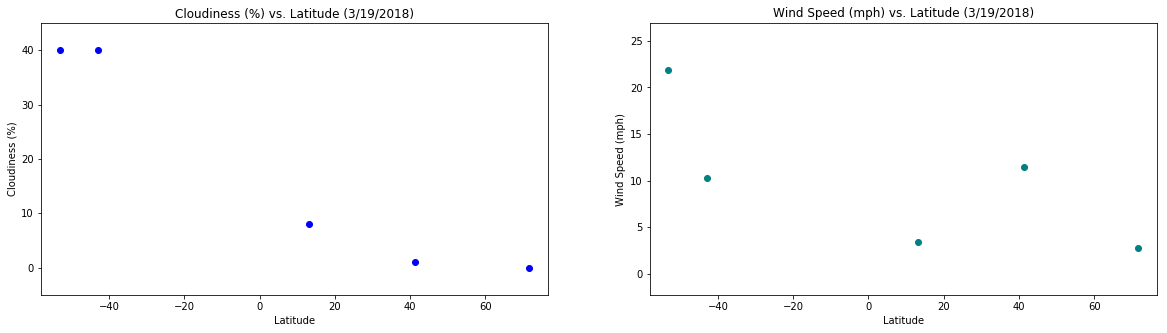

In [8]:
#  Scatter plot to showcase Cloudiness (%)vs. Latitude and Wind Speed (mph) vs. Latitude

# Create figure
fig = plt.figure(figsize=(20, 5))

# Make plot on the left
fig.add_subplot(1, 2, 1)
plt.title("Cloudiness (%) vs. Latitude (3/19/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# ADJUST FIGURE SIZE TO FIT ALL EXTREME POINTS
plt.xlim(min(lat) - 5, max(lat) + 5)
plt.ylim(min(cloudiness_data) - 5, max(cloudiness_data) + 5)

plt.scatter(lat, cloudiness_data, marker="o", color="blue")

#  Scatter plot to showcase  Wind Speed (mph) vs. Latitude

# Make plot on the right
fig.add_subplot(1, 2, 2)
plt.title("Wind Speed (mph) vs. Latitude (3/19/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# ADJUST FIGURE SIZE TO FIT ALL EXTREME POINTS
plt.xlim(min(lat) - 5, max(lat) + 5)
plt.ylim(min(speed_data) - 5, max(speed_data) + 5)

plt.scatter(lat, speed_data, marker="o", color="teal")
plt.show()